In [7]:
import pandas as pd
import numpy as np

# Load dataset (update path if needed)
df = pd.read_csv("../data/raw/GlobalWeatherRepository.csv")

# Preview data
print("Shape:", df.shape)
print(df.head())
print("\nColumns:", df.columns)

Shape: (90222, 41)
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    

In [8]:
# Dataset info
df.info()

# Basic statistics
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90222 entries, 0 to 90221
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       90222 non-null  object 
 1   location_name                 90222 non-null  object 
 2   latitude                      90222 non-null  float64
 3   longitude                     90222 non-null  float64
 4   timezone                      90222 non-null  object 
 5   last_updated_epoch            90222 non-null  int64  
 6   last_updated                  90222 non-null  object 
 7   temperature_celsius           90222 non-null  float64
 8   temperature_fahrenheit        90222 non-null  float64
 9   condition_text                90222 non-null  object 
 10  wind_mph                      90222 non-null  float64
 11  wind_kph                      90222 non-null  float64
 12  wind_degree                   90222 non-null  int64  
 13  w

In [13]:
# Count missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary.head(20))

# % of missing values
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percent.head(20))

country                   0
location_name             0
latitude                  0
longitude                 0
timezone                  0
last_updated_epoch        0
last_updated              0
temperature_celsius       0
temperature_fahrenheit    0
condition_text            0
wind_mph                  0
wind_kph                  0
wind_degree               0
wind_direction            0
pressure_mb               0
pressure_in               0
precip_mm                 0
precip_in                 0
humidity                  0
cloud                     0
dtype: int64
country                   0.0
location_name             0.0
latitude                  0.0
longitude                 0.0
timezone                  0.0
last_updated_epoch        0.0
last_updated              0.0
temperature_celsius       0.0
temperature_fahrenheit    0.0
condition_text            0.0
wind_mph                  0.0
wind_kph                  0.0
wind_degree               0.0
wind_direction            0.0
pressur

In [18]:
import pandas as pd

# Drop rows where 'country' or 'last_updated' are missing
critical_cols = [col for col in ['country', 'last_updated'] if col in df.columns]
df = df.dropna(subset=critical_cols)

# Fill missing temperature values (if any) with the mean
if 'temperature_celsius' in df.columns:
    df['temperature_celsius'] = df['temperature_celsius'].fillna(df['temperature_celsius'].mean())

# Standardize country/location names
df['country'] = df['country'].str.strip().str.lower()
df['location_name'] = df['location_name'].str.strip().str.lower()

# Ensure numeric columns are properly typed
numeric_cols = ['temperature_celsius','wind_kph','humidity','pressure_mb',
                'precip_mm','visibility_km','uv_index','gust_kph']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Optionally convert 'last_updated' into datetime
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

In [19]:
# Ensure last_updated is datetime
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

# Extract year and month
df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month

# Select numeric columns for aggregation
numeric_cols = ['temperature_celsius','wind_kph','humidity','pressure_mb',
                'precip_mm','visibility_km','uv_index','gust_kph']

# Group by country + year + month → take mean of numeric values
monthly_avg = (
    df.groupby(['country','year','month'])[numeric_cols]
      .mean()
      .reset_index()
)

# Preview result
print(monthly_avg.head())

# Save cleaned + aggregated dataset
monthly_avg.to_csv("cleaned_monthly_weather.csv", index=False)

       country  year  month  temperature_celsius   wind_kph   humidity  \
0  afghanistan  2024      5            20.305882  11.517647  38.058824   
1  afghanistan  2024      6            25.590000  17.110000  24.833333   
2  afghanistan  2024      7            31.303448  20.731034  17.931034   
3  afghanistan  2024      8            30.848387  20.196774  20.548387   
4  afghanistan  2024      9            28.216667  12.223333  13.733333   

   pressure_mb  precip_mm  visibility_km  uv_index   gust_kph  
0  1010.000000   0.108824       9.764706  3.764706  16.141176  
1  1004.900000   0.072667       9.800000  6.500000  20.336667  
2   998.000000   0.000345      10.000000  7.758621  23.841379  
3  1001.258065   0.037097       9.774194  7.483871  23.238710  
4  1004.800000   0.014333       9.833333  7.000000  14.063333  


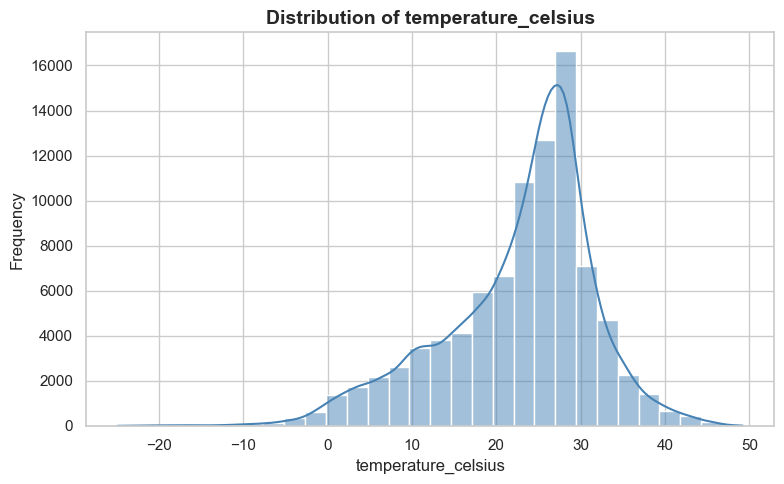

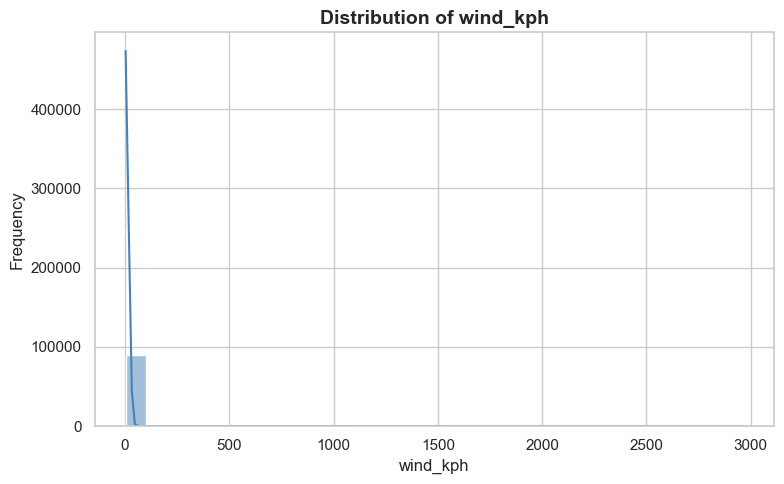

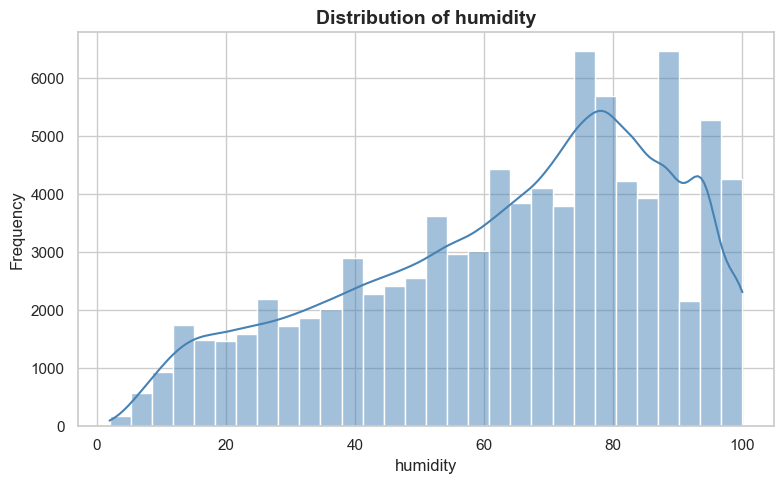

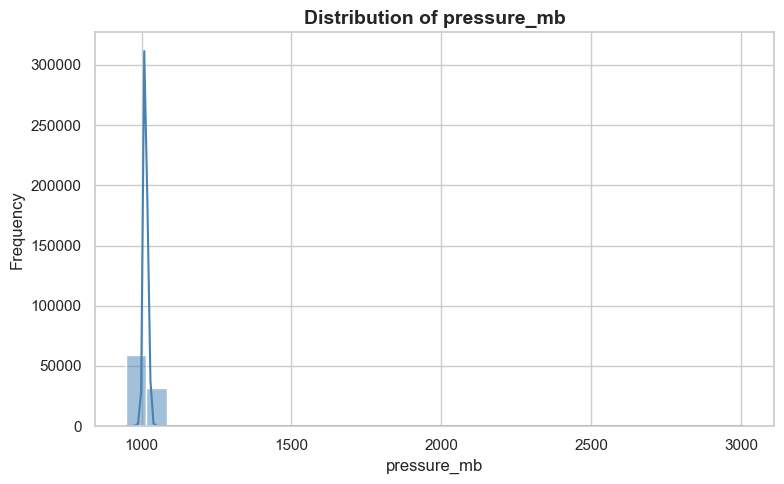

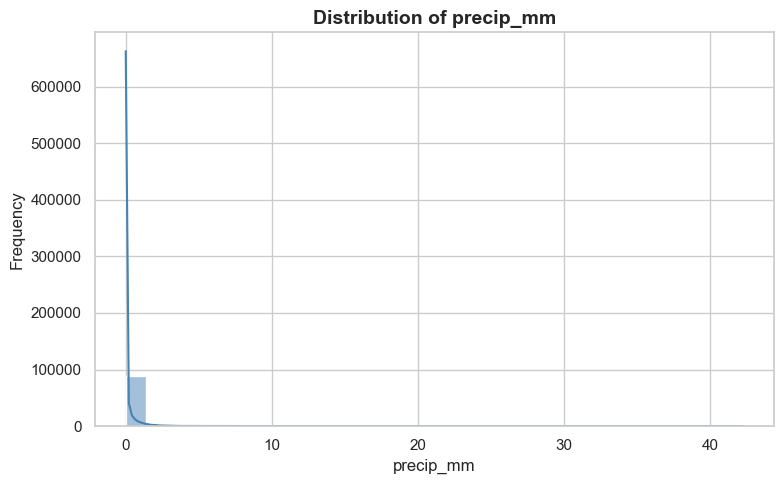

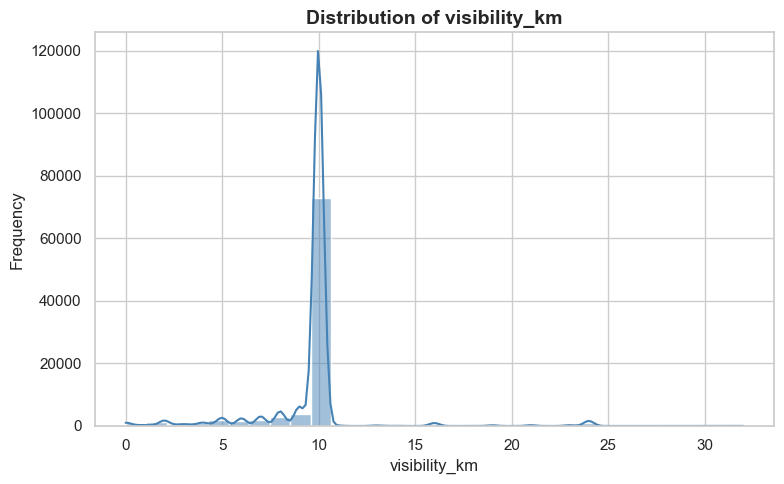

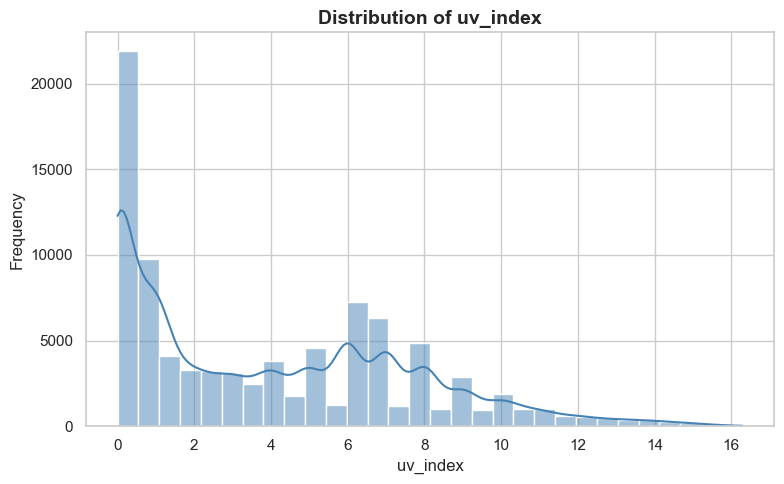

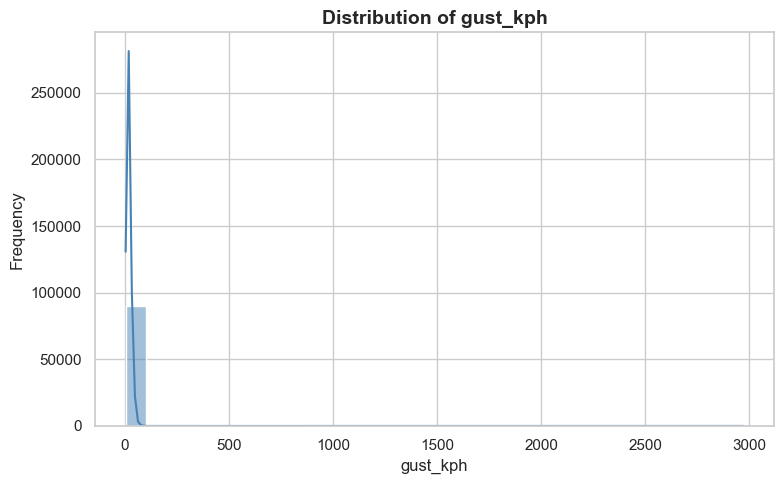

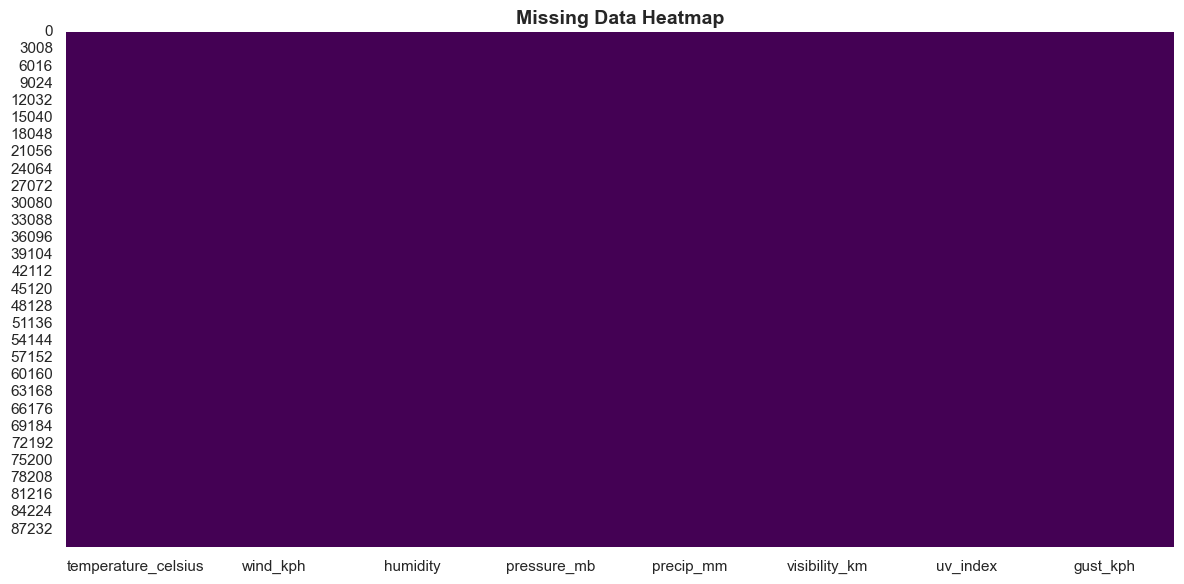

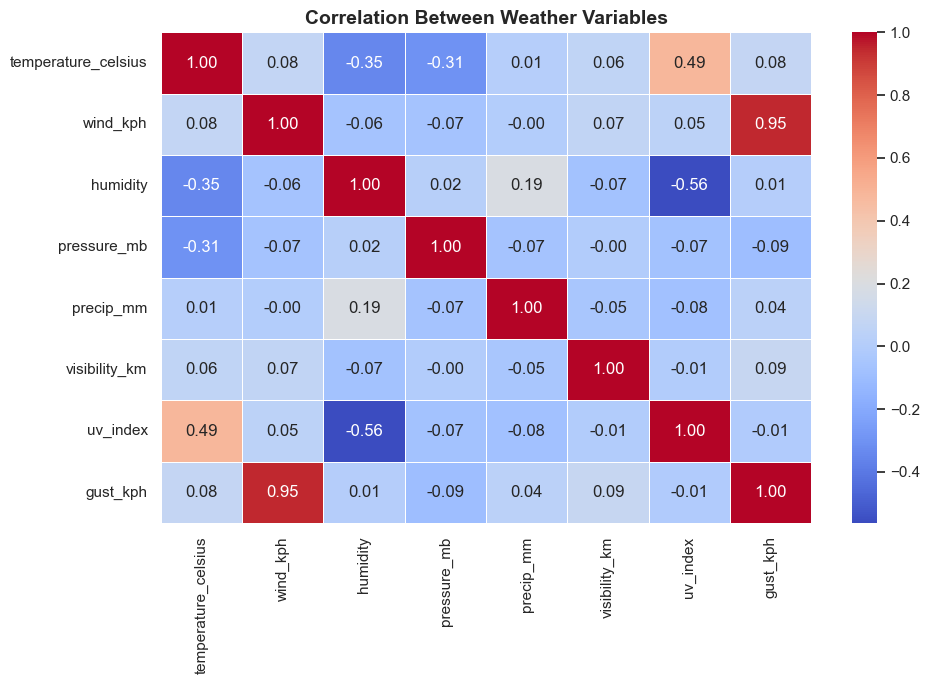

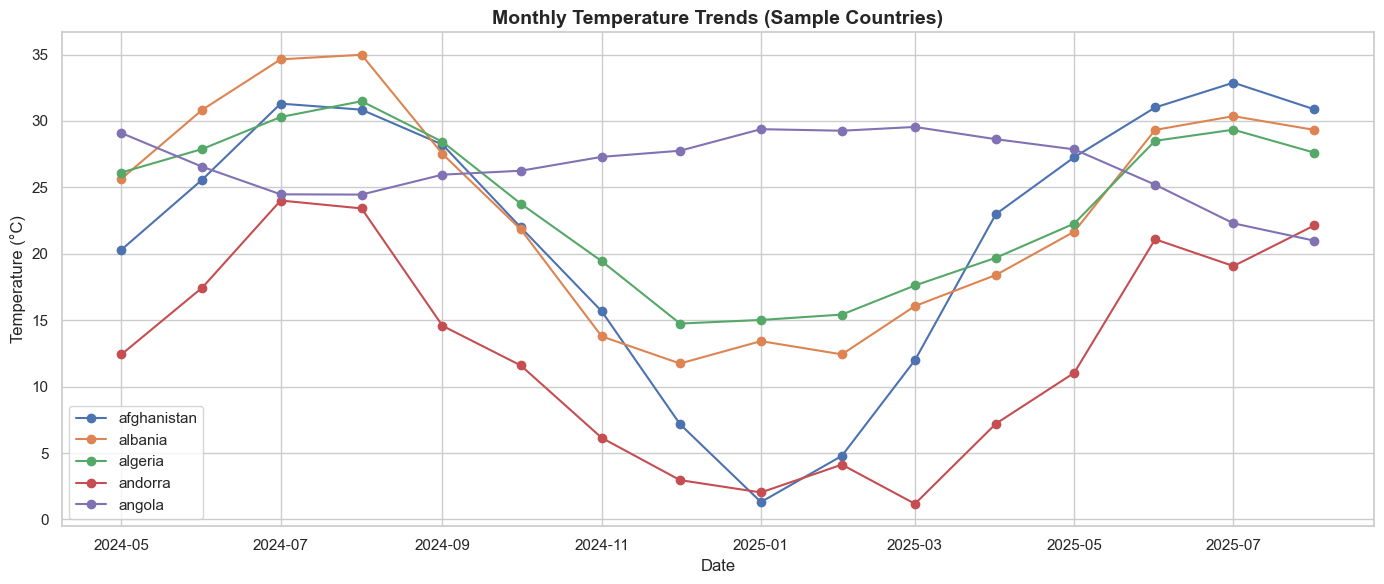

C:\Users\cgspl\AppData\Local\Temp\ipykernel_17484\2339872789.py:67: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\cgspl\AppData\Local\Temp\ipykernel_17484\2339872789.py:67: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\cgspl\ClimateScope\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cgspl\ClimateScope\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


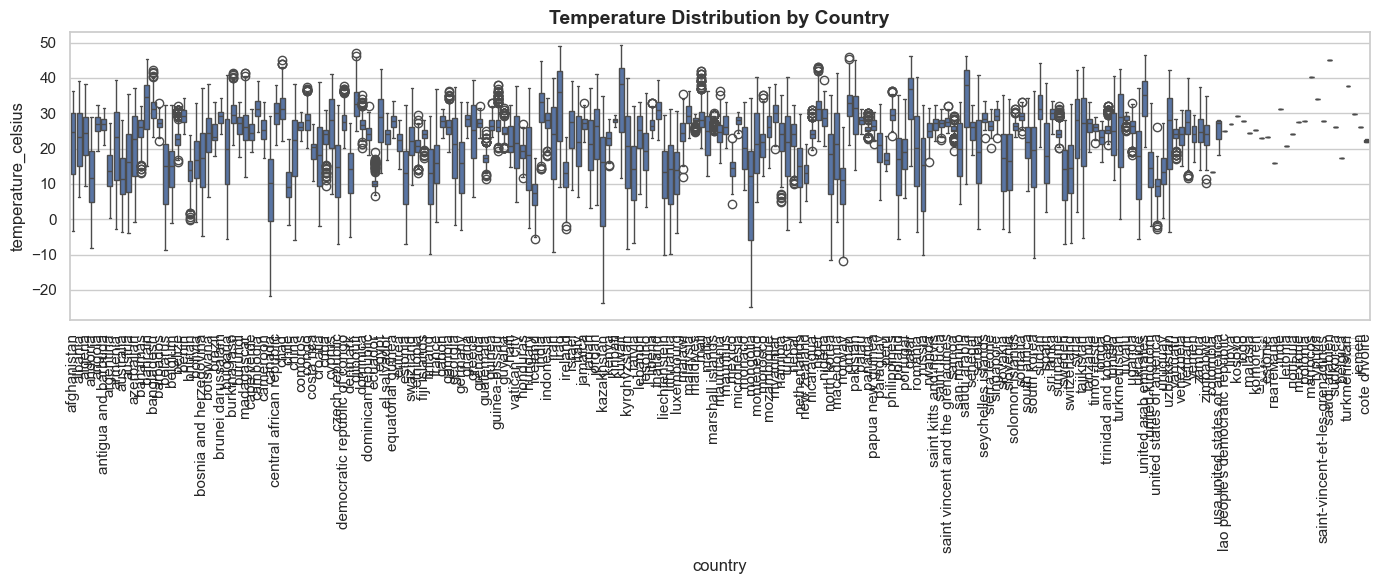

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style for professionalism
sns.set_theme(style="whitegrid")

# --------------------------
# 1. Histograms for key variables
# --------------------------
numeric_cols = ['temperature_celsius','wind_kph','humidity',
                'pressure_mb','precip_mm','visibility_km',
                'uv_index','gust_kph']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True, color="steelblue")
    plt.title(f"Distribution of {col}", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# --------------------------
# 2. Missing values heatmap
# --------------------------
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_cols].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# --------------------------
# 3. Correlation heatmap
# --------------------------
plt.figure(figsize=(10,7))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Between Weather Variables", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# --------------------------
# 4. Country-level Temperature Trends
# --------------------------
plt.figure(figsize=(14,6))
sample_countries = df['country'].dropna().unique()[:5]  # first 5 countries as sample
for country in sample_countries:
    subset = df[df['country'] == country]
    subset = subset.groupby(['year','month'])['temperature_celsius'].mean().reset_index()
    subset['date'] = pd.to_datetime(subset[['year','month']].assign(day=1))
    plt.plot(subset['date'], subset['temperature_celsius'], marker="o", label=country)

plt.title("Monthly Temperature Trends (Sample Countries)", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# 5. Boxplot for country comparison
# --------------------------
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="country", y="temperature_celsius")
plt.title("Temperature Distribution by Country", fontsize=14, weight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Milestone 1: Initial Data Analysis
This notebook performs the **data preparation & initial analysis** for the ClimateScope project.